In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import layers
import scipy.stats as stat
import pylab

In [56]:
!git init

Reinitialized existing Git repository in /content/.git/


In [57]:
!git config — global user.email "ranjith13119@gmail.com"

usage: git config [<options>]

Config file location
    --global              use global config file
    --system              use system config file
    --local               use repository config file
    -f, --file <file>     use given config file
    --blob <blob-id>      read config from given blob object

Action
    --get                 get value: name [value-regex]
    --get-all             get all values: key [value-regex]
    --get-regexp          get values for regexp: name-regex [value-regex]
    --get-urlmatch        get value specific for the URL: section[.var] URL
    --replace-all         replace all matching variables: name value [value_regex]
    --add                 add a new variable: name value
    --unset               remove a variable: name [value-regex]
    --unset-all           remove all matches: name [value-regex]
    --rename-section      rename section: old-name new-name
    --remove-section      remove a section: name
    -l, --list            list all
 

In [58]:
!git config — global user.name "ranjith13119@gmail.com"

usage: git config [<options>]

Config file location
    --global              use global config file
    --system              use system config file
    --local               use repository config file
    -f, --file <file>     use given config file
    --blob <blob-id>      read config from given blob object

Action
    --get                 get value: name [value-regex]
    --get-all             get all values: key [value-regex]
    --get-regexp          get values for regexp: name-regex [value-regex]
    --get-urlmatch        get value specific for the URL: section[.var] URL
    --replace-all         replace all matching variables: name value [value_regex]
    --add                 add a new variable: name value
    --unset               remove a variable: name [value-regex]
    --unset-all           remove all matches: name [value-regex]
    --rename-section      rename section: old-name new-name
    --remove-section      remove a section: name
    -l, --list            list all
 

# **Data Preprocessing**

In [26]:
dataset = pd.read_csv("/content/drive/MyDrive/ANN/Real_Combine.csv")

In [27]:
dataset.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [28]:
def plot_feature_distribution(feature):
  plt.figure(figsize=(10,3))
  plt.subplot(1,2,1)
  dataset[feature].hist()
  plt.subplot(1,2,2)
  stat.probplot(dataset[feature],dist='norm',plot=pylab)
  plt.show()

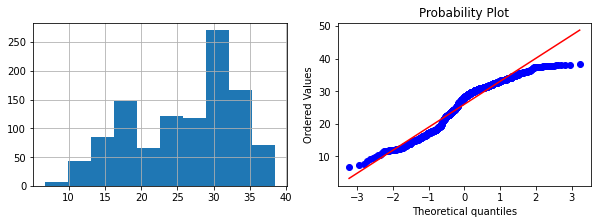

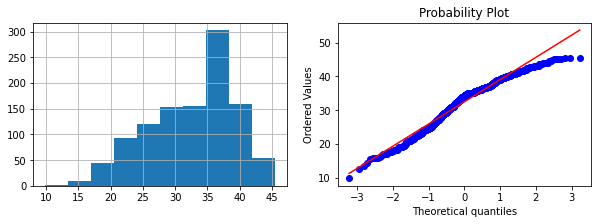

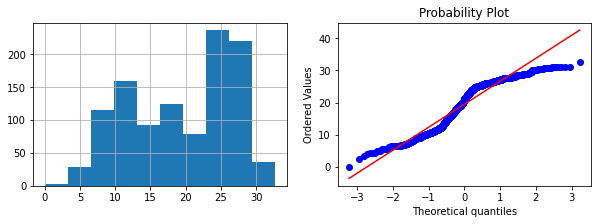

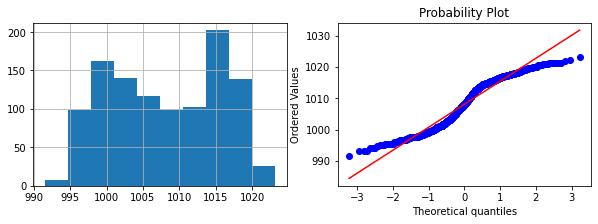

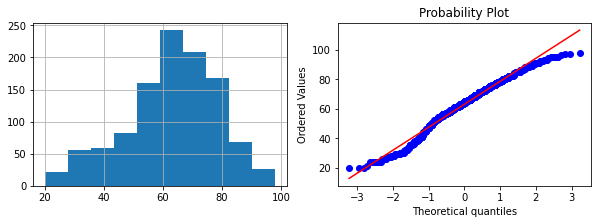

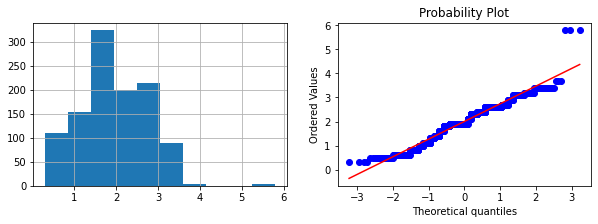

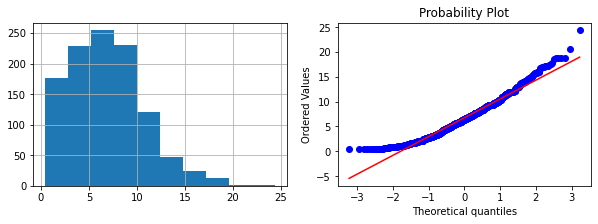

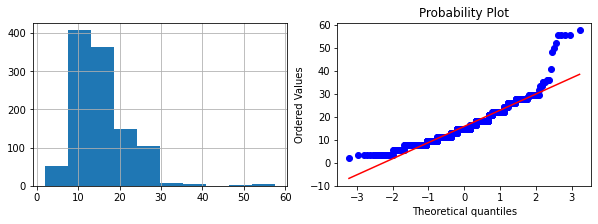

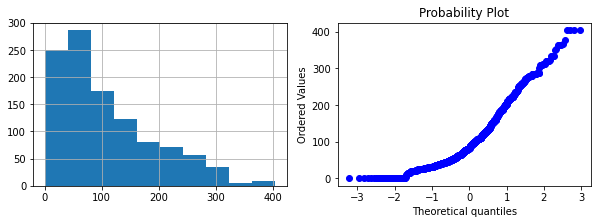

In [29]:
for feature in dataset.columns:
  plot_feature_distribution(feature)

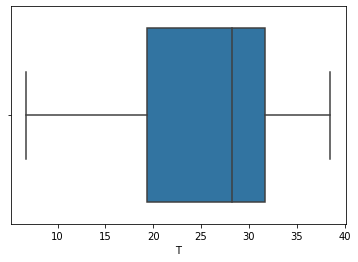

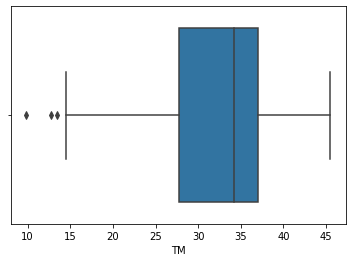

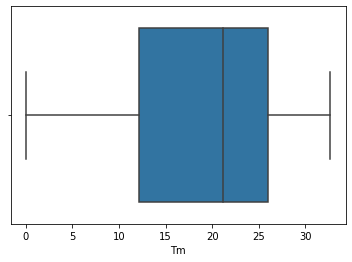

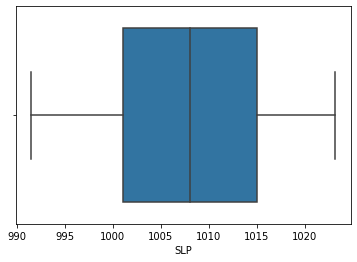

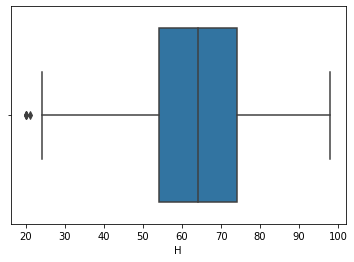

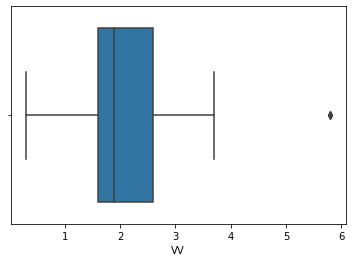

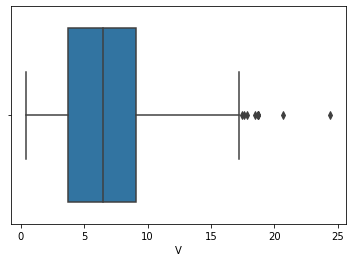

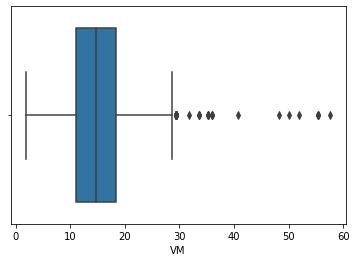

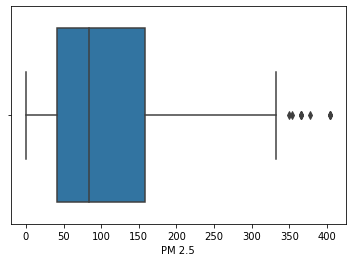

In [30]:
for feature in dataset.columns:
  sns.boxplot(x=dataset[feature])
  plt.show()

In [31]:
dataset.shape

(1093, 9)

In [32]:
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1

In [33]:
#removing outlaier using IQR Method

dataset_out = dataset[~((dataset < (Q1 - 1.5 * IQR)) |(dataset > (Q3 + 1.5 * IQR))).any(axis=1)]

In [34]:
dataset_out.shape

(1033, 9)

In [35]:
dataset.shape

(1093, 9)

In [36]:
IQR_V=dataset.V.quantile(0.75) - dataset.V.quantile(0.25)

In [37]:
IQR_V

5.3999999999999995

In [38]:
lower_bridge_V = dataset['V'].quantile(0.25)-(IQR_V*1.5)
upper_bridge_v = dataset['V'].quantile(0.75)+(IQR_V*1.5)

In [39]:
#### Extreme outliers
lower_bridge_v=dataset['V'].quantile(0.25)-(IQR*3)
upper_bridge_v=dataset['V'].quantile(0.75)+(IQR*3)
print(lower_bridge_v)
print(upper_bridge_v)

T         -33.500
TM        -23.900
Tm        -38.000
SLP       -38.000
H         -56.300
VV          0.700
V         -12.500
VM        -17.900
PM 2.5   -345.675
dtype: float64
T          46.300
TM         36.700
Tm         50.800
SLP        50.800
H          69.100
VV         12.100
V          25.300
VM         30.700
PM 2.5    358.475
dtype: float64


In [40]:
dataset_copy = dataset.copy()

In [41]:
dataset_copy.loc[dataset_copy.V >= 25, 'V'] = 25

In [42]:
IQR_VM=dataset.VM.quantile(0.75) - dataset.VM.quantile(0.25)

In [43]:
#### Extreme outliers
lower_bridge_vm=dataset['VM'].quantile(0.25)-(IQR*3)
upper_bridge_vm=dataset['VM'].quantile(0.75)+(IQR*3)
print(lower_bridge_vm)
print(upper_bridge_vm)

T         -26.100
TM        -16.500
Tm        -30.600
SLP       -30.600
H         -48.900
VV          8.100
V          -5.100
VM        -10.500
PM 2.5   -338.275
dtype: float64
T          55.500
TM         45.900
Tm         60.000
SLP        60.000
H          78.300
VV         21.300
V          34.500
VM         39.900
PM 2.5    367.675
dtype: float64


In [44]:
dataset_copy.loc[dataset_copy.VM >= 34.5, 'VM'] = 34.5

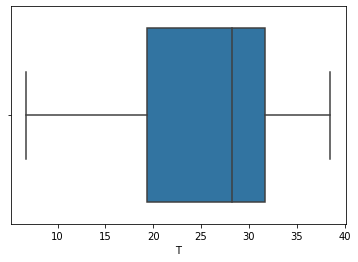

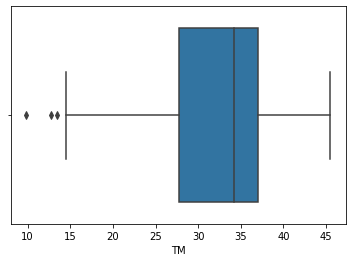

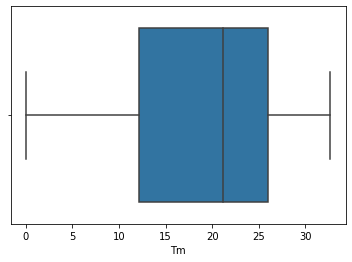

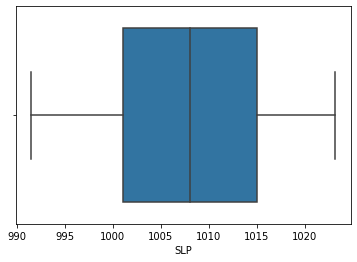

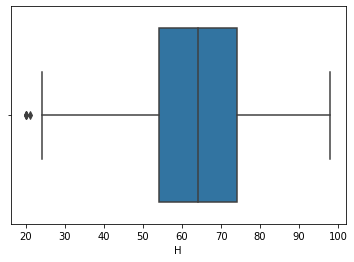

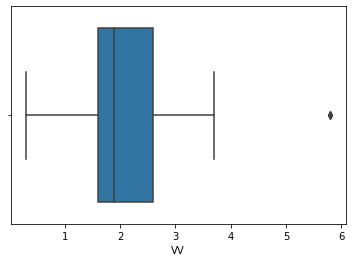

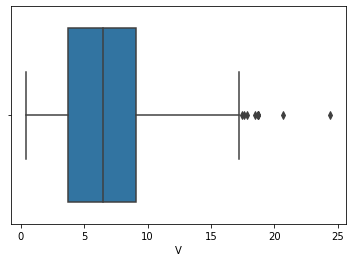

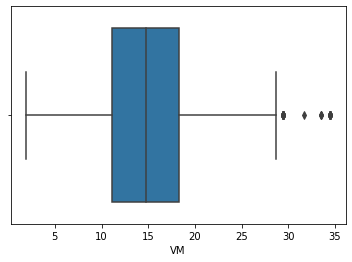

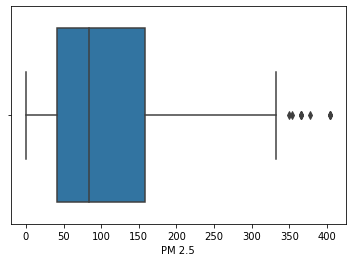

In [45]:
for feature in dataset_copy.columns:
  sns.boxplot(x=dataset_copy[feature])
  plt.show()

# **Data Visualization**

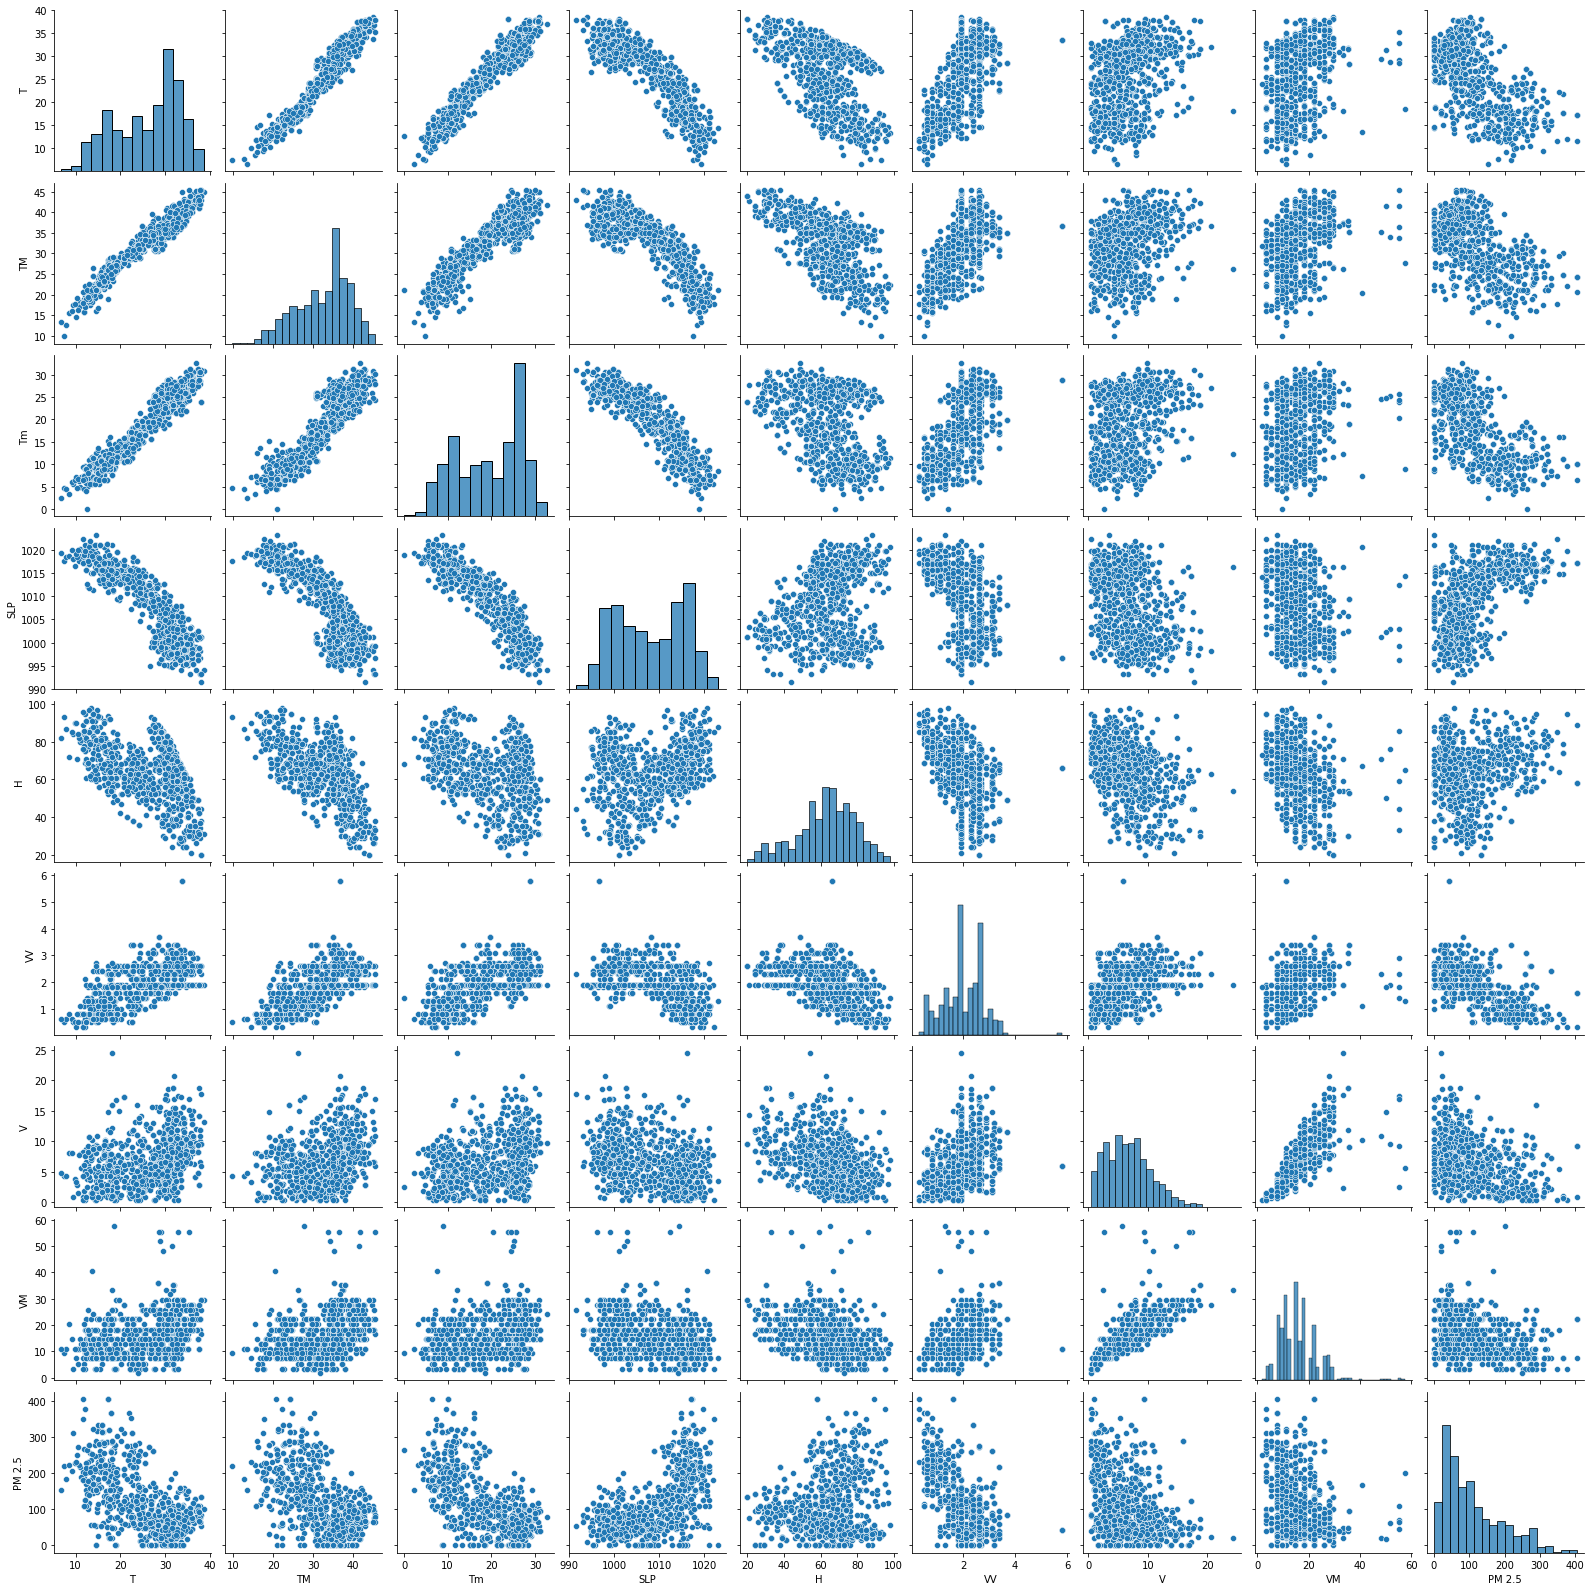

In [47]:
sns.pairplot(dataset)

# **Train & test set split**

In [48]:
X = dataset.drop("PM 2.5", axis = 1)
y = dataset["PM 2.5"]

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# **Feature Selection**

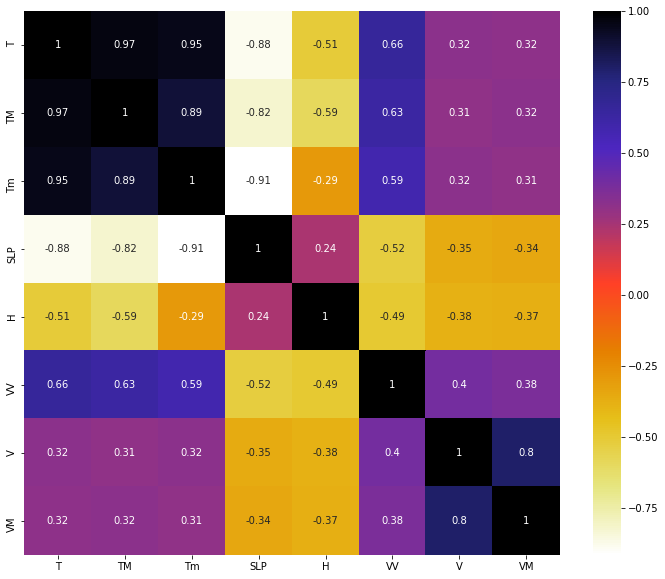

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [51]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [52]:
corr_features = correlation(X_train, 0.85)
len(set(corr_features))

3

In [53]:
X_train.drop(corr_features,axis=1, inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [54]:
X_train.shape

(874, 5)

# **Feature Scaling**

In [55]:
from sklearn.preprocessing import RobustScaler
sc = RobustScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **ANN**

In [ ]:
import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import ReLU, LeakyReLU, PReLU, ELU
from keras.layers import Dropout

In [ ]:
annClassifier = Sequential()

In [ ]:
annClassifier.add(Dense(units = 6, activation= "relu", kernel_initializer='he_uniform', input_dim = 5))

In [ ]:
annClassifier.add(Dense(units = 6, activation= "relu", kernel_initializer='he_uniform'))

In [ ]:
annClassifier.add(Dense(units = 1, activation= "linear"))

In [ ]:
annClassifier.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_error'])

In [ ]:
 model_history=annClassifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
59/59 [==============================] - 1s 7ms/step - loss: 110.4653 - mean_absolute_error: 110.4653 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2/100
59/59 [==============================] - 0s 2ms/step - loss: 107.6320 - mean_absolute_error: 107.6320 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3/100
59/59 [==============================] - 0s 3ms/step - loss: 110.4311 - mean_absolute_error: 110.4311 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4/100
59/59 [==============================] - 0s 2ms/step - loss: 115.6904 - mean_absolute_error: 115.6904 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5/100
59/59 [==============================] - 0s 3ms/step - loss: 112.0611 - mean_absolute_error: 112.0611 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6/100
59/59 [==============================] - 0s 2ms/step - loss: 108.3046 - mean_absolute_error: 108.3046 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7/100
59/59 [===============

In [ ]:
y_pred = annClassifier.predict(X_test)

In [ ]:
y_pred

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
print("Model performace for testing set")
rmse = (np.sqrt(mean_squared_error(y_test, y_test)))
r2 = r2_score(y_test, y_test)

Model performace for testing set


In [ ]:
print(rmse, r2)

0.0 1.0


In [ ]:
print(model_history.history.keys())

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


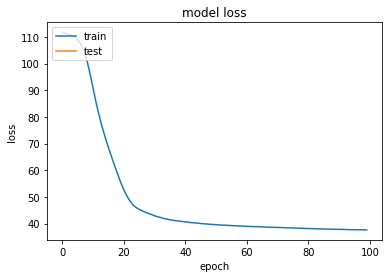

In [ ]:
# summarize history for accuracy
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

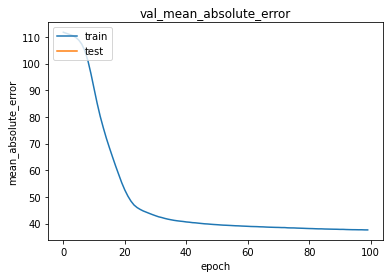

In [ ]:
plt.plot(model_history.history['mean_absolute_error'])
plt.plot(model_history.history['val_mean_absolute_error'])
plt.title('val_mean_absolute_error')
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from tensorflow import keras

In [ ]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error',
        metrics=['mean_absolute_error'])
    return model

In [ ]:
!pip install -q -U keras-tuner

In [ ]:
from kerastuner.tuners import RandomSearch
tuner = RandomSearch(
    build_model,
    objective='val_mean_absolute_error',
    max_trials=5,
    executions_per_trial=3,
    directory='project',
    project_name='Air Quality Index')

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [ ]:
tuner.search(X_train, y_train,
             epochs=5,
             validation_data=(X_test, y_test))

Trial 5 Complete [00h 00m 08s]
val_mean_absolute_error: nan

Best val_mean_absolute_error So Far: nan
Total elapsed time: 00h 00m 52s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary()

# **Linear Regression**